In [2]:
import numpy as np
import cv2
from PIL import Image 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
from keras.applications import vgg16
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback

In [3]:
train_path = 'Data/Artists_4/train'
valid_path = 'Data/Artists_4/valid'
test_path = 'Data/Artists_4/test'

In [4]:
#Preprocessing images using Keras ImageDataGenerator

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['Edgar_Degas', 'Vincent_van_Gogh', 'Pablo_Picasso', 'Paul_Gauguin'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['Edgar_Degas', 'Vincent_van_Gogh', 'Pablo_Picasso', 'Paul_Gauguin'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['Edgar_Degas', 'Vincent_van_Gogh', 'Pablo_Picasso', 'Paul_Gauguin'], batch_size=10, shuffle=False)

Found 1400 images belonging to 4 classes.
Found 380 images belonging to 4 classes.
Found 170 images belonging to 4 classes.


In [5]:
#Import the VGG16 model from Keras
vgg16_model = tf.keras.applications.vgg16.VGG16()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [7]:
#Iterate over each of the layers in our new Sequential model and set them to be non-trainable
for layer in model.layers:
    layer.trainable = False

In [8]:
#We add our new output layer consisting in 4 nodes 
model.add(Dense(units=4, activation='softmax'))

In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
#We will be using function 'callback' to reduce the overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, min_delta=1e-4)  
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1, min_delta=1e-4)  
callbacks = [early_stop, reduce_lr] 

In [13]:
#Train the model
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          callbacks=callbacks,
          epochs=25,
          verbose=2)

Epoch 1/25
140/140 - 883s - loss: 0.5767 - acc: 0.7957 - val_loss: 0.8772 - val_acc: 0.6658
Epoch 2/25
140/140 - 858s - loss: 0.4881 - acc: 0.8300 - val_loss: 0.7978 - val_acc: 0.6921
Epoch 3/25
140/140 - 852s - loss: 0.4246 - acc: 0.8529 - val_loss: 0.7726 - val_acc: 0.7368
Epoch 4/25
140/140 - 886s - loss: 0.3742 - acc: 0.8750 - val_loss: 0.7008 - val_acc: 0.7500
Epoch 5/25
140/140 - 901s - loss: 0.3379 - acc: 0.8993 - val_loss: 0.7367 - val_acc: 0.7158
Epoch 6/25
140/140 - 879s - loss: 0.3017 - acc: 0.9057 - val_loss: 0.6964 - val_acc: 0.7526
Epoch 7/25
140/140 - 844s - loss: 0.2713 - acc: 0.9143 - val_loss: 0.7598 - val_acc: 0.7368
Epoch 8/25
140/140 - 852s - loss: 0.2429 - acc: 0.9321 - val_loss: 0.6920 - val_acc: 0.7711
Epoch 9/25
140/140 - 851s - loss: 0.2184 - acc: 0.9436 - val_loss: 0.6497 - val_acc: 0.7974
Epoch 10/25
140/140 - 861s - loss: 0.2010 - acc: 0.9471 - val_loss: 0.6399 - val_acc: 0.7921
Epoch 11/25
140/140 - 854s - loss: 0.1826 - acc: 0.9543 - val_loss: 0.6479 - va

In [15]:
#Visualize processed images

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

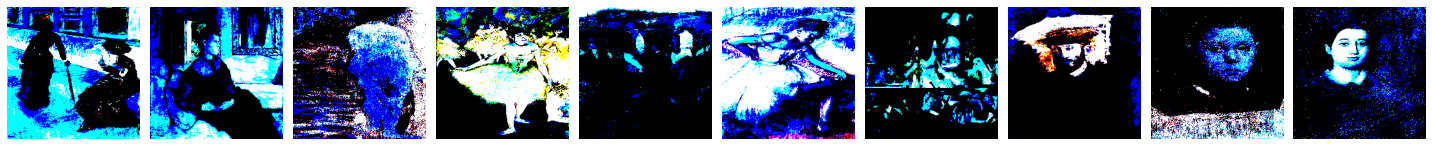

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [16]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [17]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=2)

17/17 - 83s


In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[44  1  2  3]
 [ 1 45  2  2]
 [10  9 29  2]
 [ 2  3  1 14]]


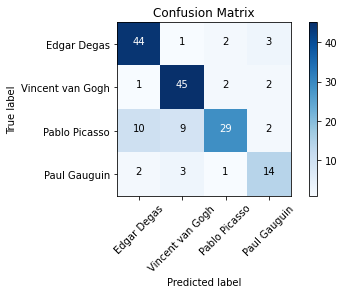

In [20]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['Edgar Degas', 'Vincent van Gogh', 'Pablo Picasso', 'Paul Gauguin']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [47]:
#Save model
import os.path
if os.path.isfile('Model/vgg16_4artists.h5') is False:
    model.save('Model/vgg16_4artists.h5')

# Testing the model

In [45]:
def test_img():
    
    #Path of the image
    img_path = 'Data/Test'
    
    #Show image
    img = Image.open('Data/Test/painting_test/examen-de-danza-edgar-degas_1.jpg')
    print(plt.imshow(img))
    
    #Preprocessing the image
    img_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=img_path, target_size=(224,224), classes=None, class_mode=None, batch_size=1)
    
    #Predict the autor of the painting
    prediction = model.predict(x=img_batches, steps=len(img_batches), verbose=2)
    pred_tuple = np.round(prediction)
    artists_dict = {0:'Edgar Degas', 1:'Vincent van Gogh', 2:'Pablo Picasso', 3:'Paul Gauguin'}
    print(f'Artist: {artists_dict[list(pred_tuple[0]).index(1)]}')

AxesImage(54,36;334.8x217.44)
Found 1 images belonging to 1 classes.
1/1 - 1s
Artist: Edgar Degas


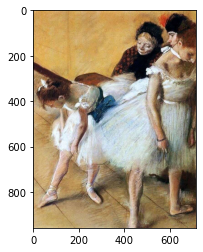

In [46]:
test_img()